___

<a href='https://sites.google.com/fat.uerj.br/livia'> <img src='../../figures/capa2.png' /></a>
___

In [1]:
path_data = '../../data/'
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

# Deflategate
Em 18 de janeiro de 2015, o Indianapolis Colts e o New England Patriots jogaram o jogo do campeonato da American Football Conference (AFC) para determinar qual desses times jogaria no Super Bowl. Após o jogo, houve alegações de que as bolas de futebol dos Patriots não haviam sido infladas tanto quanto o regulamento exigia; eles eram mais macios. Isso pode ser uma vantagem, pois bolas mais macias podem ser mais fáceis de pegar.

Durante várias semanas, o mundo do futebol americano foi consumido por acusações, desmentidos, teorias e suspeitas: a imprensa rotulou o tema Deflategate, após o escândalo político de Watergate na década de 1970. A National Football League (NFL) encomendou uma análise independente. Neste exemplo, realizaremos nossa própria análise dos dados.

A pressão geralmente é medida em libras por polegada quadrada (psi). As regras da NFL estipulam que as bolas de jogo devem ser infladas para ter pressões na faixa de 12,5 psi e 13,5 psi. Cada equipe joga com 12 bolas. As equipes têm a responsabilidade de manter a pressão em suas próprias bolas de futebol, mas os oficiais do jogo inspecionam as bolas. Antes do início do jogo AFC, todas as bolas dos Patriots estavam em cerca de 12,5 psi. A maioria das bolas dos Colts estava em cerca de 13,0 psi. No entanto, esses dados pré-jogo não foram registrados.

Durante o segundo quarto, os Colts interceptaram uma bola do Patriots. Nos bastidores, eles mediram a pressão da bola e determinaram que ela estava abaixo do limite de 12,5 psi. Prontamente, eles informaram as autoridades.

No intervalo, todas as bolas do jogo foram recolhidas para inspeção. Dois árbitros, Clete Blakeman e Dyrol Prioleau, mediram a pressão em cada uma das bolas.

Aqui estão os dados. Cada linha corresponde a uma bola de futebol. A pressão é medida em psi. A bola do Patriots que havia sido interceptada pelos Colts não foi inspecionada no intervalo. Nem a maioria das bolas dos Colts - os árbitros simplesmente ficaram sem tempo e tiveram que abrir mão das bolas para o início do jogo do segundo tempo.

In [2]:
football = pd.read_csv(path_data + 'deflategate.csv')
football

,Team,Blakeman,Prioleau
0,Patriots,11.50,11.80
1,Patriots,10.85,11.20
2,Patriots,11.15,11.50
3,Patriots,10.70,11.00
4,Patriots,11.10,11.45
5,Patriots,11.60,11.95
6,Patriots,11.85,12.30
7,Patriots,11.10,11.55
8,Patriots,10.95,11.35
9,Patriots,10.50,10.90


Para cada uma das 15 bolas inspecionadas, os dois árbitros obtiveram resultados diferentes. Não é incomum que medições repetidas no mesmo objeto produzam resultados diferentes, especialmente quando as medições são realizadas por pessoas diferentes. Assim, atribuiremos a cada bola a média das duas medições feitas nessa bola.

In [3]:
football['Combined'] = (football['Blakeman'] + football['Prioleau']) / 2
football.drop(['Blakeman', 'Prioleau'], axis=1, inplace=True)
football

,Team,Combined
0,Patriots,11.650
1,Patriots,11.025
2,Patriots,11.325
3,Patriots,10.850
4,Patriots,11.275
5,Patriots,11.775
6,Patriots,12.075
7,Patriots,11.325
8,Patriots,11.150
9,Patriots,10.700


À primeira vista, parece evidente que as bolas de futebol dos Patriots estavam com uma pressão menor do que as bolas dos Colts. Como alguma deflação é normal durante o jogo, os analistas independentes decidiram calcular a queda de pressão desde o início do jogo. Lembre-se de que as bolas dos Patriots começaram todas com cerca de 12,5 psi e as bolas dos Colts com cerca de 13,0 psi. Portanto, a queda na pressão para as bolas dos Patriots foi calculada como 12,5 menos a pressão no meio-tempo, e a queda na pressão para as bolas dos Colts foi 13,0 menos a pressão no meio-tempo.

Podemos calcular a queda de pressão para cada bola de futebol, configurando primeiro uma matriz dos valores iniciais. Para isso, precisaremos de um array composto por 11 valores, cada um dos quais é 12,5, e outro composto por quatro valores, cada um dos quais é 13. Usaremos a função NumPy `np.ones`, que recebe uma contagem como seu argumento e retorna uma matriz de tantos elementos, cada um dos quais é 1.

In [4]:
np.ones(11)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [5]:
patriots_start = 12.5 * np.ones(11)
colts_start = 13 * np.ones(4)
start = np.append(patriots_start, colts_start)
start

array([12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5,
       13. , 13. , 13. , 13. ])

The drop in pressure for each football is the difference between the starting pressure and the combined pressure measurement.

In [7]:
drop = start - football.loc[:, 'Combined']
football['Pressure Drop'] = drop
football

,Team,Combined,Pressure Drop
0,Patriots,11.650,0.850
1,Patriots,11.025,1.475
2,Patriots,11.325,1.175
3,Patriots,10.850,1.650
4,Patriots,11.275,1.225
5,Patriots,11.775,0.725
6,Patriots,12.075,0.425
7,Patriots,11.325,1.175
8,Patriots,11.150,1.350
9,Patriots,10.700,1.800


Parece que as quedas dos Patriots foram maiores que as dos Colts. Vejamos a queda média em cada um dos dois grupos. Não precisamos mais das pontuações combinadas.

In [8]:
football.drop(['Combined'], axis=1, inplace=True)
football.groupby('Team').mean()

,Pressure Drop
Team,
Colts,0.468750
Patriots,1.202273


A queda média para os Patriots foi de cerca de 1,2 psi em comparação com cerca de 0,47 psi para os Colts.

A questão agora é por que as bolas de futebol dos Patriots tiveram uma queda maior na pressão, em média, do que as bolas de futebol dos Colts. Pode ser por acaso?

## As Hipóteses
Como o acaso entra aqui? Nada estava sendo selecionado aleatoriamente. Mas podemos fazer um modelo de chance levantando a hipótese de que as 11 quedas dos Patriots parecem uma amostra aleatória de 11 de todas as 15 quedas, com as quedas dos Colts sendo as quatro restantes. Esse é um modelo de chance completamente especificado sob o qual podemos simular dados. Portanto, é a **hipótese nula**.

Como alternativa, podemos assumir a posição de que as quedas dos Patriots são muito grandes, em média, para se assemelhar a uma amostra aleatória retirada de todas as quedas.

## Estatística de teste
Uma estatística natural é a diferença entre as duas quedas médias, que calcularemos como "queda média para Patriots - queda média para Colts". Grandes valores dessa estatística favorecerão a hipótese alternativa.

In [9]:
football.groupby('Team').mean()

,Pressure Drop
Team,
Colts,0.468750
Patriots,1.202273


In [10]:
observed_means = football.groupby('Team').mean()['Pressure Drop']

observed_difference = observed_means[1] - observed_means[0]
observed_difference

0.733522727272728

Essa diferença positiva reflete o fato de que a queda média de pressão das bolas de futebol dos Patriots foi maior do que a dos Colts.

Assim como fizemos na seção anterior, escreveremos uma função para calcular a diferença entre as quedas médias nos dois grupos. A função `difference_of_means` recebe dois argumentos:

- o nome da tabela de dados
- o rótulo da coluna que contém os dois rótulos de grupo

Ele retorna a diferença entre as quedas médias dos dois grupos. Calcularemos a diferença como as quedas dos Patriots menos as quedas dos Colts como antes.

In [11]:
def difference_of_means(table, group_label):
    reduced = table.loc[:, ['Pressure Drop', group_label]]
    means_table = reduced.groupby(group_label).mean()
    means = means_table['Pressure Drop']
    return means[1] - means[0]

In [12]:
difference_of_means(football, 'Team')

0.733522727272728

Este é o mesmo valor que encontramos anteriormente como a `difference_of_means`.

## Prevendo a estatística sob a hipótese nula
Se a hipótese nula fosse verdadeira, então não deveria importar quais bolas de futebol são rotuladas como Patriots e quais são rotuladas como Colts. As distribuições dos dois conjuntos de gotas seriam as mesmas. Podemos simular isso embaralhando aleatoriamente os rótulos das equipes.

In [24]:
shuffled_labels = football.sample(replace=False, n=len(football))['Team']
original_and_shuffled = football.assign(Shuffled_Label=shuffled_labels.reset_index(drop=True))
original_and_shuffled

,Team,Pressure Drop,Shuffled_Label
0,Patriots,0.850,Colts
1,Patriots,1.475,Colts
2,Patriots,1.175,Colts
3,Patriots,1.650,Patriots
4,Patriots,1.225,Patriots
5,Patriots,0.725,Patriots
6,Patriots,0.425,Patriots
7,Patriots,1.175,Patriots
8,Patriots,1.350,Colts
9,Patriots,1.800,Patriots


Como todas as médias do grupo se comparam?

In [25]:
difference_of_means(original_and_shuffled, 'Shuffled_Label')

-0.2806818181818185

In [26]:
difference_of_means(original_and_shuffled, 'Team')

0.733522727272728

Os valores médios de queda das duas equipes são mais próximos quando os rótulos das equipes são atribuídos aleatoriamente às bolas de futebol do que eram para os dois grupos realmente usados no jogo.

## Teste de Permutação
É hora de dar um passo que agora é familiar. Simularemos repetidamente a estatística de teste sob a hipótese nula.

permutando repetidamente as bolas de futebol e atribuindo conjuntos aleatórios aos dois times.

Como de costume, começaremos escrevendo uma função `one_simulated_difference` que retorna um valor simulado da diferença entre as quedas de pressão média dos grupos chamados Patriots e Colts após permutar aleatoriamente os rótulos dos times das bolas de futebol.

In [ ]:
def one_simulated_difference_of_means():
    """Returns: Difference between mean birthweights
    of babies of smokers and non-smokers after shuffling labels"""
    
    # array of shuffled labels
    shuffled_labels = births['Maternal Smoker'].sample(replace=False, n=len(births))
    # table of birth weights and shuffled labels
    shuffled_table = births.loc[:, ['Maternal Age']].copy()
    shuffled_table['Shuffled_Label'] = shuffled_labels.reset_index(drop=True)
    
    # difference between mean birth weights of the two groups
    return difference_of_means(shuffled_table, 'Shuffled_Label')   

In [58]:
def one_simulated_difference():
    shuffled_labels = football['Team'].sample(replace = False, n = len(football))
    shuffled_table = football[['Pressure Drop']].assign(
        Shuffled_Label = shuffled_labels.reset_index(drop = True))
    return difference_of_means(shuffled_table, 'Shuffled_Label')  

In [65]:
one_simulated_difference()

0.20511363636363633

We can now use a `for` loop and this function to create an array `differences` that contains 10,000 values of the test statistic simulated under the null hypothesis.

In [66]:
differences = np.array([])

repetitions = 10000
for i in np.arange(repetitions):
    new_difference = one_simulated_difference()
    differences = np.append(differences, new_difference)

## Conclusão do Teste
Para calcular o valor P empírico, é importante relembrar a hipótese alternativa, que é que as quedas dos Patriots são grandes demais para serem o resultado apenas da variação do acaso.

Quedas maiores para os Patriots favorecem a hipótese alternativa. Portanto, o valor-p é a chance (calculada sob a hipótese nula) de obter uma estatística de teste igual ao nosso valor observado de 0,733522727272728 ou maior.

A figura abaixo visualiza este cálculo. Consiste na distribuição empírica da estatística de teste sob a hipótese nula, com a estatística observada marcada em vermelho no eixo horizontal e a área correspondente ao p-valor sombreada em dourado.

Observed Difference: 0.733522727272728


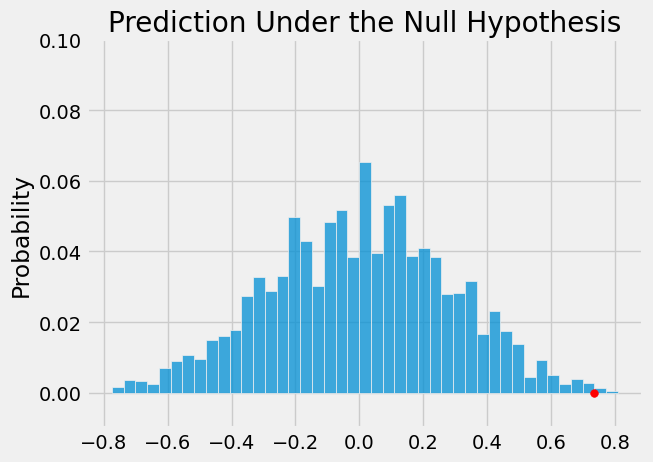

In [71]:
sns.histplot(differences, stat='probability')

plt.ylim(-0.01, 0.1)
plt.scatter(observed_difference, 0, color='red', s=30, zorder=3)
plt.title('Prediction Under the Null Hypothesis')
print('Observed Difference:', observed_difference)

A olho nu, o valor-p parece bem pequeno. Podemos confirmar isso por um cálculo.

In [72]:
empirical_p = np.count_nonzero(differences >= observed_difference) / 10000
empirical_p

0.0027

Como nos exemplos anteriores deste teste, a maior parte da distribuição é centrada em torno de 0. Sob a hipótese nula, as quedas dos Patriots são uma amostra aleatória de todas as 15 quedas e, portanto, também são as dos Colts. Portanto, os dois conjuntos de gotas devem ser aproximadamente iguais em média e, portanto, sua diferença deve ser em torno de 0.

Mas o valor observado da estatística de teste está bem longe do centro da distribuição. Por qualquer corte razoável para o que é "pequeno", o valor P empírico é pequeno. Assim, acabamos rejeitando a hipótese nula de aleatoriedade e concluímos que as quedas dos Patriots eram muito grandes para refletir apenas a variação do acaso.

A equipe de investigação independente analisou os dados de várias maneiras diferentes, levando em consideração as leis da física. O relatório final disse,

> "[A] queda de pressão média das bolas do jogo Patriots excedeu a queda de pressão média das bolas Colts em 0,45 a 1,02 psi, dependendo de várias suposições possíveis em relação aos medidores usados e assumindo uma pressão inicial de 12,5 psi para os Patriots bolas e 13,0 para as bolas Colts."
>
> -- *Relatório investigativo encomendado pela NFL sobre o jogo do campeonato da AFC em 18 de janeiro de 2015*

Nossa análise mostra uma queda de pressão média de cerca de 0,73 psi, que está próxima ao centro do intervalo "0,45 a 1,02 psi" e, portanto, consistente com a análise oficial.

Lembre-se de que nosso teste de hipóteses não estabelece o motivo *por que* a diferença não se deve ao acaso. Estabelecer a causalidade geralmente é mais complexo do que executar um teste de hipóteses.

Mas a questão mais importante no mundo do futebol era sobre a causalidade: a questão era se a queda excessiva de pressão nas bolas de futebol dos Patriots era deliberada. Se você está curioso sobre a resposta dada pelos investigadores, aqui está o [relatório completo](https://nfllabor.files.wordpress.com/2015/05/investigative-and-expert-reports-re-footballs-used- durante-afc-championsh.pdf).